# KCNH5 and developmental and epileptic encephalopathy-112 (DEE112)


[DEE112](https://omim.org/entry/620537) is caused by heterozygous mutation in the [KCNH5](https://omim.org/entry/605716) gene.

KCNH5 encodes the voltage-gated potassium channel EAG2/Kv10.2. developmental and epileptic
encephalopathy 112 (DEE112) an autosomal dominant disorder characterized by a wide range of seizure types, including focal and generalized seizures. Cognitive outcomes range from normal intellect to profound impairment ([Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/)).

For this analysis, we have collected data from the following publications.

- [Veeramah KR,  et al., 2013](https://pubmed.ncbi.nlm.nih.gov/23647072/) Exome sequencing reveals new causal mutations in children with epileptic encephalopathies. 
- [Minardi R, et al., 2020](https://pubmed.ncbi.nlm.nih.gov/32725632/) Whole-exome sequencing in adult patients with developmental and epileptic encephalopathy: It is never too late. 
- [Hu X, et al., 2022](https://pubmed.ncbi.nlm.nih.gov/35874597/),Clinical Feature, Treatment, and KCNH5 Mutations in Epilepsy.
- [Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/), Neurodevelopmental and Epilepsy Phenotypes in Individuals With Missense Variants in the Voltage-Sensing and Pore Domains of KCNH5.
- [Huang S, et al., 2024 ](https://pubmed.ncbi.nlm.nih.gov/38708366/) Clinical phenotypes of developmental and epileptic encephalopathy-related recurrent KCNH5 missense variant p.R327H in Chinese children. 

- [Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/) reported that
>  Individuals with the recurrent p.Arg333His variant had a self-limited drug-responsive focal or generalized epilepsy and normal intellect, whereas the recurrent p.Arg327His variant was associated with infantile-onset DEE. 
- [Huang S, et al., 2024 ](https://pubmed.ncbi.nlm.nih.gov/38708366/) described potential correlations for R327H
> The authors investigate the first Chinese cohort of KCNH5 p.R327H-associated DEE and the incomplete penetrance of this KCNH5 variant. Add-on VPA therapy could be effective in such patients, especially in their early stages.

None of the above publications applied formal statistical testing to the data.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.9.1


### KCNH5
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for KCNH5.

In [2]:
gene_symbol = "KCNH5"
mane_tx_id = 'NM_139318.5'
mane_protein_id = 'NP_647479.2' 

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(release="0.1.23") as ps:
  phenopackets = list(ps.iter_cohort_phenopackets(gene_symbol))
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
   phenopackets=phenopackets,
   cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 27/27 [00:00<00:00, 846.34individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #24
    individual
     warnings:
     ·`time_element` is in currently unsupported format `ontology_class`


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
24,EEG abnormality
19,Epileptic encephalopathy
17,Bilateral tonic-clonic seizure
13,Intellectual disability
11,Global developmental delay
11,Delayed speech and language development
7,Focal-onset seizure
6,Bilateral tonic-clonic seizure with focal onset
5,Focal motor seizure
5,Autistic behavior


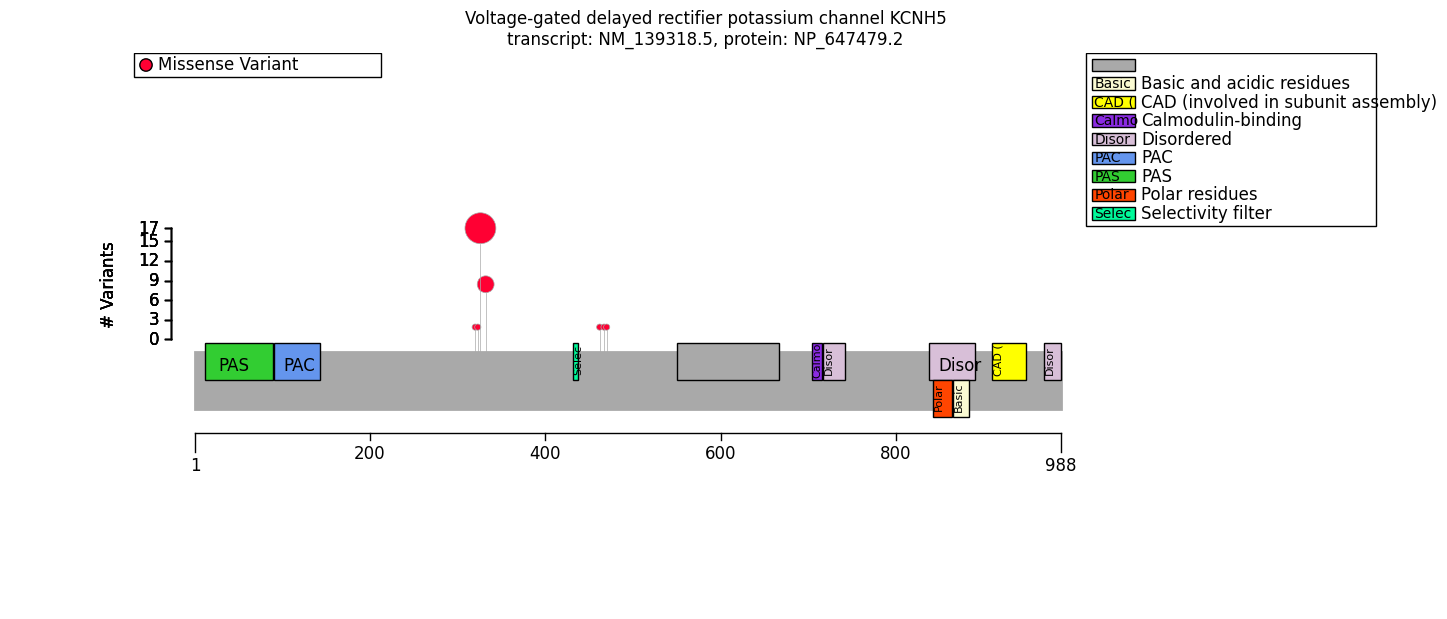

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
kcnh5_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
kcnh5_fig.tight_layout()

# Genotype Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.analysis.predicate import variant_key
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier

r327h = variant_key("14_62950522_62950522_C_T")  # c.980G>A; p.Arg327His
r333h = variant_key("14_62950504_62950504_C_T") # c.998G>A	p.Arg333His

r327h_clf = monoallelic_classifier(
    a_predicate=r327h,
    b_predicate=r333h,
    a_label="Arg327His",
    b_label="Arg333His"
)
r327h_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r327h_clf,
    pheno_clfs=pheno_clfs,
)

mtc_viewer = MtcStatsViewer()
mtc_viewer.process(r327h_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,24
HMF03,Skipping term because of a child term with the same individual counts,4
HMF05,Skipping term because one genotype had zero observations,1
HMF08,Skipping general term,15
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,41


In [9]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=r327h_result)

Allele group                                       Arg327His          \
                                                       Count Percent   
Epileptic encephalopathy [HP:0200134]                  15/15    100%   
Intellectual disability [HP:0001249]                   11/11    100%   
EEG abnormality [HP:0002353]                           16/16    100%   
Focal impaired awareness motor seizure [HP:0032...       1/8     12%   
Bilateral tonic-clonic seizure with focal onset...      3/12     25%   
Focal-onset seizure [HP:0007359]                       13/13    100%   
Seizure [HP:0001250]                                   17/17    100%   
Neurodevelopmental delay [HP:0012758]                  15/15    100%   
Neurodevelopmental abnormality [HP:0012759]            16/16    100%   
Abnormality of central nervous system electroph...     16/16    100%   
Bilateral tonic-clonic seizure [HP:0002069]            15/16     94%   
Delayed speech and language development [HP:000...       9/9    100%   
Abnormal communication [HP:0034434]                      9/9    100%   

Allele group                                       Arg333His          \
                                                       Count Percent   
Epileptic encephalopathy [HP:0200134]                    0/3      0%   
Intellectual disability [HP:0001249]                     0/2      0%   
EEG abnormality [HP:0002353]                             2/4     50%   
Focal impaired awareness motor seizure [HP:0032...       2/4     50%   
Bilateral tonic-clonic seizure with focal onset...       2/4     50%   
Focal-onset seizure [HP:0007359]                         2/2    100%   
Seizure [HP:0001250]                                     4/4    100%   
Neurodevelopmental delay [HP:0012758]                    2/2    100%   
Neurodevelopmental abnormality [HP:0012759]              2/2    100%   
Abnormality of central nervous system electroph...       2/2    100%   
Bilateral tonic-clonic seizure [HP:0002069]              4/4    100%   
Delayed speech and language development [HP:000...       2/2    100%   
Abnormal communication [HP:0034434]                      2/2    100%   

Allele group                                                           \
                                                   Corrected p values   
Epileptic encephalopathy [HP:0200134]                        0.015931   
Intellectual disability [HP:0001249]                         0.083333   
EEG abnormality [HP:0002353]                                 0.136842   
Focal impaired awareness motor seizure [HP:0032...           0.768182   
Bilateral tonic-clonic seizure with focal onset...           1.000000   
Focal-onset seizure [HP:0007359]                             1.000000   
Seizure [HP:0001250]                                         1.000000   
Neurodevelopmental delay [HP:0012758]                        1.000000   
Neurodevelopmental abnormality [HP:0012759]                  1.000000   
Abnormality of central nervous system electroph...           1.000000   
Bilateral tonic-clonic seizure [HP:0002069]                  1.000000   
Delayed speech and language development [HP:000...           1.000000   
Abnormal communication [HP:0034434]                          1.000000   

Allele group                                                  
                                                    p values  
Epileptic encephalopathy [HP:0200134]               0.001225  
Intellectual disability [HP:0001249]                0.012821  
EEG abnormality [HP:0002353]                        0.031579  
Focal impaired awareness motor seizure [HP:0032...  0.236364  
Bilateral tonic-clonic seizure with focal onset...  0.546703  
Focal-onset seizure [HP:0007359]                    1.000000  
Seizure [HP:0001250]                                1.000000  
Neurodevelopmental delay [HP:0012758]               1.000000  
Neurodevelopmental abnormality [HP:0012759]         1.000000  
Abnormality of central nervous system electroph..

In [10]:
from gpsea.analysis.clf import sex_classifier
mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Epileptic encephalopathy [HP:0200134]                8/11     73%  11/11   
EEG abnormality [HP:0002353]                        12/14     86%  12/12   
Intellectual disability [HP:0001249]                  5/7     71%    8/9   
Focal-onset seizure [HP:0007359]                    11/11    100%    9/9   
Seizure [HP:0001250]                                14/14    100%  13/13   
Encephalopathy [HP:0001298]                           8/8    100%  11/11   
Global developmental delay [HP:0001263]               5/6     83%    6/6   
Neurodevelopmental delay [HP:0012758]               10/10    100%  11/11   
Neurodevelopmental abnormality [HP:0012759]         10/10    100%  12/12   
Abnormality of central nervous system electroph...  12/12    100%  12/12   
Bilateral tonic-clonic seizure [HP:0002069]         12/12    100%  11/12   
Delayed speech and language development [HP:000...    6/6    100%    5/6   
Language impairment [HP:0002463]                      6/6    100%    5/5   
Abnormal communication [HP:0034434]                   6/6    100%    5/5   
Abnormal speech pattern [HP:0002167]                  6/6    100%    5/5   
Focal motor seizure [HP:0011153]                      8/8    100%    5/5   
Motor seizure [HP:0020219]                          10/10    100%    6/6   

Sex                                                                            \
                                                   Percent Corrected p values   
Epileptic encephalopathy [HP:0200134]                 100%                1.0   
EEG abnormality [HP:0002353]                          100%                1.0   
Intellectual disability [HP:0001249]                   89%                1.0   
Focal-onset seizure [HP:0007359]                      100%                1.0   
Seizure [HP:0001250]                                  100%                1.0   
Encephalopathy [HP:0001298]                           100%                1.0   
Global developmental delay [HP:0001263]               100%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Abnormality of central nervous system electroph...    100%                1.0   
Bilateral tonic-clonic seizure [HP:0002069]            92%                1.0   
Delayed speech and language development [HP:000...     83%                1.0   
Language impairment [HP:0002463]                      100%                1.0   
Abnormal communication [HP:0034434]                   100%                1.0   
Abnormal speech pattern [HP:0002167]                  100%                1.0   
Focal motor seizure [HP:0011153]                      100%                1.0   
Motor seizure [HP:0020219]                            100%                1.0   

Sex                                                           
                                                    p values  
Epileptic encephalopathy [HP:0200134]               0.214286  
EEG abnormality [HP:0002353]                        0.483077  
Intellectual disability [HP:0001249]                0.550000  
Focal-onset seizure [HP:0007359]                    1.000000  
Seizure [HP:0001250]                                1.000000  
Encephalopathy [HP:0001298]                         1.000000  
Global developmental delay [HP:0001263]             1.000000  
Neurodevelopmental delay [HP:0012758]               1.000000  
Neurodevelopmental abnormality [HP:0012759]         1.000000  
Abnormality of central nervous system electroph...  1.000000  
Bilateral tonic-clonic seizure [HP:0002069]         1.000000  
Delayed speech and language development [HP:000...  1.000000  
Language impairment [HP:0002463]                    1.000000  
Abnormal communication [HP:0034434]                 1.000000  
Abnorma

# Summary

In [11]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=r327h_result,
    ),
     GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)
cohort_name = gene_symbol

caption = """Two recurrent variants have been reported, p.Arg327His and p.Arg333His, both of which are located in or near the functionally critical 
voltage-sensing or pore domains. Happ et al (2023) state that in their cohort, Individuals with the recurrent p.Arg333His variant had a self-limited 
drug-responsive focal or generalized epilepsy and normal intellect, whereas the recurrent p.Arg327His variant was associated with infantile-onset DEE."""

report = GpseaAnalysisReport(
    name=cohort_name,
    cohort=cohort,
    fet_results=fet_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
    caption=caption)

In [12]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [13]:
summarizer.process_latex(report=report, protein_fig=kcnh5_fig)

Figure saved to ../../supplement/img/KCNH5_protein_diagram-draft.pdf
Output to ../../supplement/tex/KCNH5_summary_draft.tex
